# Data Visuals

## Objectives

* This notebook will be displaying my visualisations

## Inputs

* I used the following modules:
 * import numpy as np
 * import pandas as pd
 * import matplotlib.pyplot as plt
 * import seaborn as sns


## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Capstone-project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Capstone-project'

# Section 1

Section 1 content

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:\\Capstone-project\\Dataset\\rawdata\\Online Retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [7]:
df.drop_duplicates(inplace=True)
df.drop(labels=['InvoiceDate'],axis=1, inplace=True)


In [64]:
#df

In [8]:
df['Transaction Value'] = df.apply(lambda x: x['Quantity'] * x['UnitPrice'], axis=1)

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Transaction Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60


# The countries and their numerical value

In [10]:
df['Country_num'] = df['Country'].astype('category').cat.codes
df[['Country', 'Country_num']]


,Country,Country_num
0,United Kingdom,36
1,United Kingdom,36
2,United Kingdom,36
3,United Kingdom,36
4,United Kingdom,36
...,...,...
541904,France,13
541905,France,13
541906,France,13
541907,France,13


In [11]:
df['Transaction Value'] = df['Quantity'] * df['UnitPrice']

country_sales = (
    df.groupby('Country')['Transaction Value']
    .sum()
    .sort_values(ascending=False)
)


In [12]:
top15 = country_sales.head(15)

* Matplotlib 

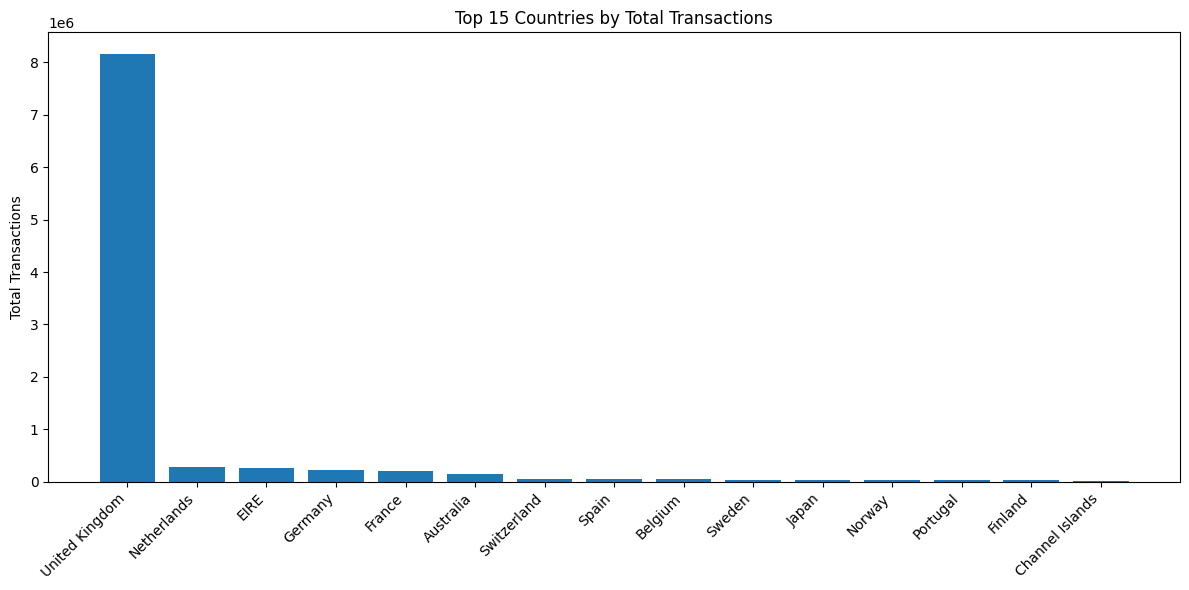

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top15.index, top15.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Transactions')
plt.title('Top 15 Countries by Total Transactions')
plt.tight_layout()
plt.show()


---

# Section 2

Section 2 content

* Seaborn 

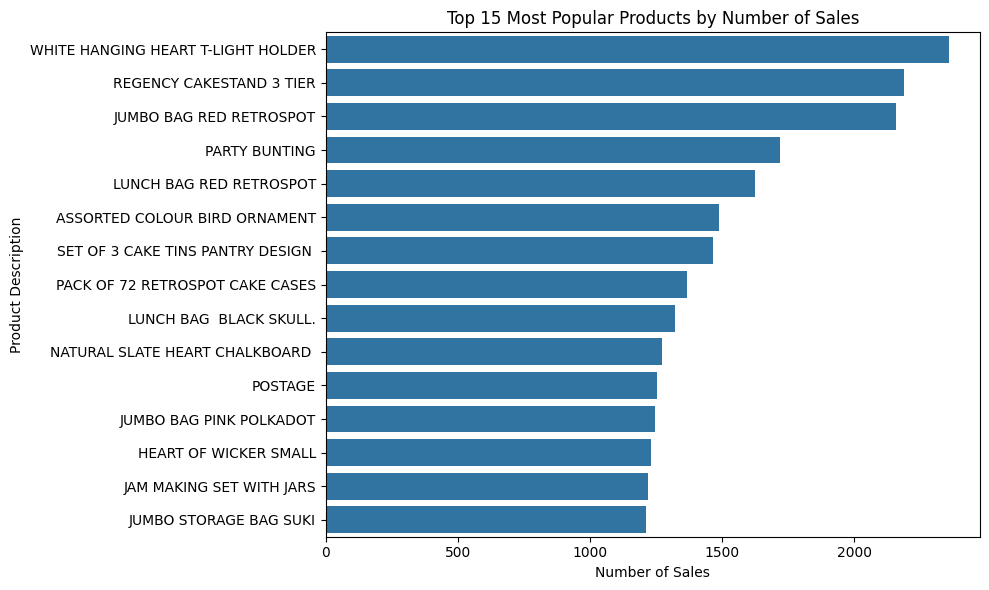

In [21]:
top_products = (
    df['Description']
    .value_counts()
    .head(15)   # top 15 products
    .reset_index()
)
top_products.columns = ['Product', 'Sales Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products,
    x='Sales Count',
    y='Product'
)

plt.title('Top 15 Most Popular Products by Number of Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Transaction Value,Country_num
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,36
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,36
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,36
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,36
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,36
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,13
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,13
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,13
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,13


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
